In [1]:

import numpy as np
import cv2 
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
 #Data cleaning

In [21]:
img =cv2.imread('./test images/jennifer-lawrence.jpg')

In [22]:
img.shape

AttributeError: 'NoneType' object has no attribute 'shape'

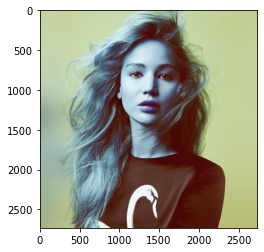

In [7]:
plt.imshow(img)

In [8]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [9]:
gray.shape
gray

array([[196, 196, 196, ..., 188, 188, 187],
       [196, 196, 196, ..., 188, 188, 187],
       [196, 196, 196, ..., 188, 188, 187],
       ...,
       [163, 163, 163, ..., 169, 169, 169],
       [163, 163, 163, ..., 169, 169, 169],
       [163, 163, 163, ..., 169, 169, 169]], dtype=uint8)

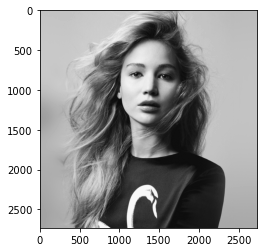

In [10]:
plt.imshow(gray,cmap='gray')

In [11]:
#detect face and eyes of the image to crop the image

In [12]:
face_cascade = cv2.CascadeClassifier('C:/Users/Divakarla Prabhakar/anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Users/Divakarla Prabhakar/anaconda3/Lib/site-packages/cv2/data/haarcascade_eye.xml')

In [13]:
faces = face_cascade.detectMultiScale(gray,1.3,5)

In [14]:
faces

array([[891, 404, 977, 977]])

In [15]:
(x,y,w,h)=faces[0]
x,y,w,h

(891, 404, 977, 977)

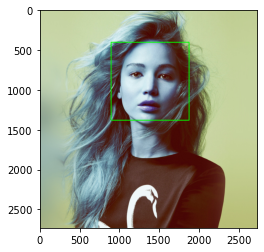

In [16]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),10)
#name of the drawing= rectangle of dimensions (img i.e colour image, (x,y,w,h), with colour red, thickness 2).
plt.imshow(face_img)

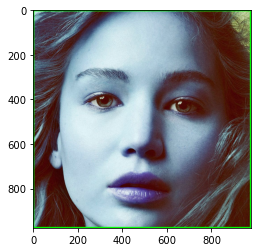

In [17]:
face_only= img[y:y+h,x:x+w]
plt.imshow(face_only)

In [18]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),10)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),10)

<function matplotlib.pyplot.show(close=None, block=None)>

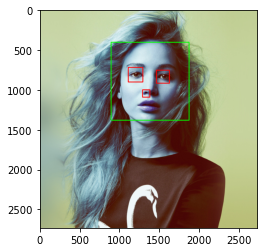

In [19]:
plt.figure
plt.imshow(face_img,cmap='gray')
plt.show

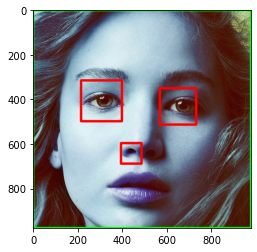

In [20]:
cropped_img=np.array(roi_color)
cropped_img.shape
plt.imshow(roi_color)

In [ ]:
wavelet transformation

In [ ]:
import numpy as np
import pywt
import cv2

def w2d (img,mode='haar',level=1):
    imArray=img
    #datatype conversions
    #convvert to grayscale
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray=np.float32(imArray)
    imArray /=255;
    #compute coefficinets
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    #process coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0;
    #reconsruction
    imArray_H=pywt.waverec2(coeffs_H,mode);
    imArray_H*=255;
    imArray_H= np.uint8(imArray_H)
    return imArray_H
    #Extracts facial features like eyes,nose........

In [ ]:
im_har= w2d(cropped_img,'db1',7)
plt.imshow(im_har,cmap='gray')

In [ ]:
def get_cropped_image_of_2_eyes(image_path):
    img=cv2.imread(image_path)
    if(img is not None):
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces= face_cascade.detectMultiScale(gray,1.3,5)
        for(x,y,w,h) in faces:
            roi_gray=gray[y:y+h,x:x+w]
            roi_color=img[y:y+h,x:x+w]
            eyes=eye_cascade.detectMultiScale(roi_gray)
            if len(eyes)>=2:
                return roi_color
        

In [ ]:
original_img= cv2.imread('C:/Users/Divakarla Prabhakar/Pictures/test images/jennifer-lawrence.jpg')
plt.imshow(original_img)

In [ ]:
cropped_img= cv2.imread('C:/Users/Divakarla Prabhakar/Pictures/test images/jennifer-lawrence_crp_2.jpeg')
plt.imshow(cropped_img)

In [ ]:
cropped_img_no_2_eyes = get_cropped_image_of_2_eyes('C:/Users/Divakarla Prabhakar/Pictures/test images/jennifer-lawrence_crp_2.jpeg')
cropped_img_no_2_eyes
#gets no output because both eyes are not clearly visible

In [ ]:
path_to_data='C:/Users/Divakarla Prabhakar/Pictures/dataset'
path_to_cr_data='C:/Users/Divakarla Prabhakar/Pictures/dataset/cropped'

In [ ]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [ ]:
img_dirs

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
cropped_img_dirs = []
celebrity_file_name_dict = {}
#creating a dictionary



    for img_dir in img_dirs:
        count=1

        celebrity_name=img_dir.split('\\')[-1]
        celebrity_file_name_dict[celebrity_name] =[]
        for entry in os.scandir(img_dir):
            roi_color=get_cropped_image_of_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = path_to_cr_data + "/" + celebrity_name
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_img_dirs.append(cropped_folder)
                    print("generating cropped image in folder: ",cropped_folder)
                cropped_file_name = celebrity_name + str(count) + ".jpg"
                cropped_file_path = cropped_folder + "/" + cropped_file_name
                cv2.imwrite(cropped_file_path,roi_color)
                celebrity_file_name_dict[celebrity_name].append(cropped_file_path)
                count+=1